In [4]:
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
from timeit import default_timer as timer
from defs import resolucion_eps,resolucion_dinamica,resolucion_dinamica_desempaquetar,resolucion_density_matriz
from scipy.integrate import odeint, solve_ivp
from scipy.interpolate import interp1d

In [5]:
tf=np.linspace(0.1,30,100)*10**(-9)

In [6]:
delta,eps=resolucion_eps()

In [7]:
tic=timer()
DF=np.zeros([1000,3,100])
for i in range(0,100):
    dinamic=resolucion_dinamica(tf[i],delta)
    DF[:,0,i]=dinamic[:,0]
    DF[:,1,i]=dinamic[:,1]
    DF[:,2,i]=dinamic[:,2]
tac=timer()
print(tac-tic)

1.964436499999998


In [8]:
tic=timer()
dataset=[]
for i in range (0,100):
    dataset.append([tf[i],delta])
agents = 4
chunksize = 1
with Pool(processes=agents) as pool:
    result=pool.map(resolucion_dinamica_desempaquetar,dataset,chunksize)
tac=timer()
print(tac-tic)
result=np.array(result)
time=result[:,:,0]
h1=result[:,:,1]
h2=result[:,:,2]

2.682895600000002


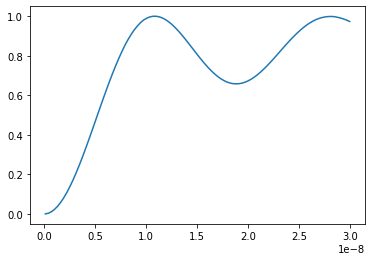

In [9]:
plt.plot(time[:,-1],h2[:,-1])

In [10]:
hbar = 1.055 * 10 ** (-34)
l = 0.1 * 1.6 * 10 ** (-19) * 10 ** (-6) / (hbar / 2)
def rhs(t, h):
    return [-1j * l * (h[2] - h[1]), -1j * (l * (h[3] - h[0]) + 2 * fDelta(t) * h[1]),-1j * (l * (h[0] - h[3]) - 2 * fDelta(t) * h[2]), -1j * l * (h[1] - h[2])]
h1=np.zeros([1000,100])
h2=np.zeros([1000,100])
for i in range (0,100):
    t0 = np.linspace(0, tf[i], 1000, endpoint=True)
    fDelta = interp1d(t0, delta, kind='cubic', fill_value="extrapolate")
    res = solve_ivp(rhs, (0, tf[i]), [1 + 0j, 0j, 0j, 0j], t_eval=t0)
    temp=np.abs(res.y)
    h1[:,i]=temp[0]
    h2[:,i]=temp[3]

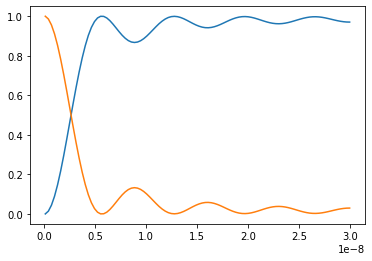

In [11]:
plt.plot(time[:,-1],h2[-1,:])
plt.plot(time[:,-1],h1[-1,:])